In [1]:
import pandas as pd
import datetime as DT
import matplotlib.pyplot as plt
from matplotlib import pyplot
out_Aggregated_Flows_Path = "output\\aggregated_flows"
# msd_path = "output\\MLOD_date.csv"

startDate = DT.date(2020,1,20)
tempTXT = "startDate,endDate,totalOutFlows\n"
for x in range(22):
    week_end = startDate + DT.timedelta(days = 6)

    tempPath = os.path.join(out_Aggregated_Flows_Path, (str(startDate)+"_"+str(week_end)+"_aggregated.csv").replace("-","_"))
    df = pd.read_csv(tempPath)
    total = df['flow'].sum()//7
    tempTXT += startDate.strftime("%d/%m")+","+week_end.strftime("%d/%m")+","+str(total)+"\n"
    # print(df.head())
    startDate = startDate + DT.timedelta(days = 7)
# print(tempTXT)
dates_file = open("output\\aggregated_Week_totOut.csv", "w")
dates_file.write(tempTXT)
dates_file.close()

  startDate endDate  totalOutFlows
0     20/01   26/01       10510563
1     27/01   02/02       10551719
2     03/02   09/02       10491686
3     10/02   16/02       10856470
4     17/02   23/02       10711743
21


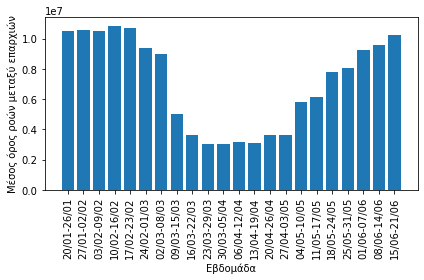

In [2]:
in_csv = "output\\aggregated_Week_totOut.csv"
df = pd.read_csv(in_csv)
print(df.head())
# df = df.set_index(['startDate','endDate'])
fig = plt.figure()

print(x)
plt.bar(x=(df.iloc[:,0]+"-"+df.iloc[:,1]),
height=df.iloc[:,2])
plt.xticks(rotation = 90)
# fig.suptitle('Ακτίνα περιστροφής ανά συσκευή', fontsize=15)
plt.xlabel('Εβδομάδα', fontsize=10)
plt.ylabel("Μέσος όρος ροών μεταξύ επαρχιών", fontsize=10)
plt.tight_layout()
plt.savefig(in_csv.replace("output","plots").replace("csv","png"), dpi = 500)

# df.plot(x =(df.iloc[:,0]+"-"+df.iloc[:,1]), y=df.iloc[:,2], kind = 'line')
# plt.show()

In [3]:
# Group covid cases weekly

covid_cases_path = "input\\Italy_Covid_Data_Province.csv"

cov_df = pd.read_csv(covid_cases_path)
cov_df['ProvinceCode'] = cov_df ['ProvinceCode'].astype(int)
cov_df['Date'] = cov_df['Date'].astype('datetime64[ns]')
cov_df['Date'] = pd.to_datetime(cov_df['Date']).dt.date

regMask = cov_df["ProvinceCode"] <= 111
cov_df_prov = cov_df.loc[regMask]


cov_df_prov = cov_df_prov[['Date','TotalPositiveCases']]
print(cov_df_prov.head())
cov_df_prov = cov_df_prov.groupby('Date').sum()
print(cov_df_prov.head(10))
cov_df_prov.to_csv("hello.csv")

prev = 0
# print(cov_df_prov.head(100))
for index, row in cov_df_prov.iterrows():
    temp = row[0]
    row[0] -= prev
    prev = temp
    # print(row[0])
# print(cov_df_prov.head(100))

cov_df_prov = cov_df_prov.reset_index()



startDate = DT.date(2020,1,20)
tempTXT = "startDate,endDate,totalCases\n"
lw = 0
for x in range(25):
    week_end = startDate + DT.timedelta(days = 6)
    # print(startDate,week_end)
    mask = (cov_df_prov['Date']>=startDate) & (cov_df_prov['Date']<=week_end)
    cov_week = cov_df_prov.loc[mask]


    temp = cov_week['TotalPositiveCases'].sum()
    tw = temp
    # lw = temp
    # tw = tw - lw
    # lw = cov_week['TotalPositiveCases'].sum()
    # tw = max(0,tw)
    
    tempTXT += startDate.strftime("%d/%m")+","+week_end.strftime("%d/%m")+","+str(tw)+"\n"

    # print(temp_cases)
    startDate = startDate + DT.timedelta(days = 7)
# print(tempTXT)
dates_file = open("output\\aggregated_Covid_Cases.csv", "w")
dates_file.write(tempTXT)
dates_file.close()

         Date  TotalPositiveCases
0  2020-02-24                   0
1  2020-02-24                   0
2  2020-02-24                   0
3  2020-02-24                   0
5  2020-02-24                   0
            TotalPositiveCases
Date                          
2020-02-24                   0
2020-02-25                 312
2020-02-26                 370
2020-02-27                 625
2020-02-28                 826
2020-02-29                1057
2020-03-01                1577
2020-03-02                1848
2020-03-03                2451
2020-03-04                2992


  startDate endDate  totalOutFlows
0     20/01   26/01       10510563
1     27/01   02/02       10551719
2     03/02   09/02       10491686
3     10/02   16/02       10856470
4     17/02   23/02       10711743
  startDate endDate  totalCases
0     20/01   26/01           0
1     27/01   02/02           0
2     03/02   09/02           0
3     10/02   16/02           0
4     17/02   23/02           0


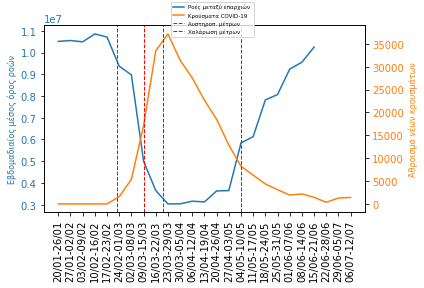

In [4]:
in_csv = "output\\aggregated_Week_totOut.csv"
cov_csv = "output\\aggregated_Covid_Cases.csv"
df = pd.read_csv(in_csv)
startIndex = -1 
print(df.head())
# df = df.set_index(['startDate','endDate'])
fig, ax1 = plt.subplots()

plt.xticks(rotation='vertical')

color = 'tab:blue'
# ax1.set_xlabel('time (s)')
ax1.set_ylabel('Εβδομαδιαίος μέσος όρος ροών', color=color, fontsize=8)
ax1.plot(df.iloc[:,0]+"-"+df.iloc[:,1],df.iloc[:,2], color=color, label = "Ροές μεταξύ επαρχιών ")
ax1.tick_params(axis='y', labelcolor=color)



# ax1.plot(df.iloc[:,0]+"-"+df.iloc[:,1],df.iloc[:,2], color = color, label = "Μέσος όρος ροών μεταξύ επαρχιών")
# ax1.set_xlabel('Εβδομάδα')
# ax1.tick_params(axis='y', labelcolor=color)
# # ax1.tight_layout()

# add covid cases
ax2 = ax1.twinx() 
color = 'tab:orange'
# N = 40 
cov_df = pd.read_csv(cov_csv)
# cov_df['totalCases'] = cov_df['totalCases'] 
ax2.set_ylabel('Άθροισμα νέων κρουσμάτων', color=color,fontsize=8)  # we already handled the x-label with ax1
print(cov_df.head())
ax2.plot(cov_df.iloc[:,0]+"-"+cov_df.iloc[:,1],cov_df.iloc[:,2], color = color, label = "Κρούσματα COVID-19")
ax2.tick_params(axis='y', labelcolor=color)

# added cases

xposition = [4.8,7,8.6]
xposition = [y-startIndex-1 for y in xposition]
xposition = [y for y in xposition if y >= 0 ]
xposition = [round(num,1) for num in xposition]
for xc in xposition[:1]:
    plt.axvline(x=xposition[0],linewidth =1, color='r', linestyle='--', label = "Αυστηροπ. μέτρων")
for xc in xposition[1:]:
    plt.axvline(x=xc,linewidth =1, color='r', linestyle='--')
xposition = [15]
xposition = [y-startIndex-1 for y in xposition]
xposition = [y for y in xposition if y >= 0 ]
xposition = [round(num,1) for num in xposition]
for xc in xposition[:1]:
    plt.axvline(x=xposition[0],linewidth =1, color='g', linestyle='--',label = "Χαλάρωση μέτρων")
for xc in xposition[1:]:
    plt.axvline(x=xc,linewidth =2, color='g', linestyle='--')


fig.tight_layout()

fig.legend(loc="upper center", prop={'size': 5.5})



plt.savefig(in_csv.replace("output","plots").replace("csv","png"), dpi = 500)

plt.show()

plt.close()


In [13]:
# temp = "2020-01-20,2020-01-27,2020-02-03,2020-02-10,2020-02-17,2020-02-24,2020-03-02,2020-03-09,2020-03-16,2020-03-23,2020-03-30,2020-04-06,2020-04-13,2020-04-20,2020-04-27,2020-05-04,2020-05-11,2020-05-18,2020-05-25,2020-06-01,2020-06-08,2020-06-15;0.0,0.1889690612213731,0.194177562009292,0.2035459969447628,0.19980426979469226,0.220810945646673,0.22529597270290597,0.43635300280335765,0.5602809389720932,0.620697474248402,0.6096467259925101,0.5946558959754902,0.5942858532229045,0.5517808406510128,0.5566543179008745,0.38932016535097047,0.3549041019745614,0.28063122922855843,0.2815972255013039,0.2399299603798521,0.23648843100006564,0.23526301750205278;0,0.0,0.18481155632938387,0.18198152962120148,0.19769864233500417,0.2172842029653482,0.209579458979425,0.43949094748698025,0.5568293376532948,0.622546853818284,0.6038183668772499,0.5975228918076158,0.592456319968934,0.5421111414273377,0.5577540083025169,0.3814617859223835,0.3524465824691018,0.2716232762319922,0.26630694660675835,0.23357752855453676,0.22460431118247987,0.2352864976294962;0,0,0.0,0.17541664049998598,0.17402707015979244,0.20048935701408557,0.20650636166977526,0.4405349413876623,0.5560630148089637,0.6141035509791204,0.6145764231484968,0.5932370573118649,0.5975324838775655,0.55084092943826,0.5520409134778758,0.3856537120217219,0.36483557376487613,0.2761192019130527,0.2666104092058072,0.22679227813354688,0.2189188445481227,0.21254596877000292;0,0,0,0.0,0.1820365083861197,0.21023567565449286,0.2144237225139819,0.4562606157543329,0.5711261259968918,0.6275576186861936,0.618255213931052,0.6068395301516193,0.6019345306863961,0.5616590965961521,0.5608320772836451,0.3916510536152605,0.37724723769184176,0.2792880322637404,0.28319353484002585,0.23315608071996746,0.22295094872406407,0.2299394743863743;0,0,0,0,0.0,0.20287502436242966,0.2076525562765732,0.44164172399698015,0.563691945807252,0.6223360076214449,0.6158728722322907,0.5994011589843953,0.5999721706180875,0.5526187843307223,0.5558344102452137,0.3916094129643782,0.3613352043595438,0.27273316311390144,0.2831025443076787,0.21806956464691632,0.21639818582576284,0.21872415606168483;0,0,0,0,0,0.0,0.18312095645611576,0.402588052490567,0.529189460969664,0.5940774784944757,0.5880778295896407,0.5702683321436101,0.5728918626306675,0.5195038163542126,0.520190369811628,0.35846990648778915,0.33187049318234835,0.25699140407072674,0.25380856252259804,0.2283266114238818,0.21370671039208336,0.23358350145965695;0,0,0,0,0,0,0.0,0.3750972100059543,0.5139405510059408,0.5799192753862474,0.5653704303480148,0.5516709242779836,0.548086081459145,0.496382462104775,0.4986852847175517,0.32351561375245963,0.30525335558513983,0.24064451727609198,0.23987887972165328,0.20759819597782916,0.21006319907170581,0.2288902155442192;0,0,0,0,0,0,0,0.0,0.3219109003900789,0.3959650385618628,0.4033756348011022,0.38026271451413035,0.38288767603767765,0.31831712956610253,0.3292197726112785,0.2716750185191563,0.283511706415234,0.3549181741850003,0.3762179073179068,0.4081449423989547,0.41599584503922626,0.44630520093259507;0,0,0,0,0,0,0,0,0.0,0.2819944550122046,0.2963520802819755,0.29369332666665476,0.29649106231812167,0.26657553680651064,0.29250656620856286,0.37227056060010477,0.387184104544993,0.46335701716660893,0.4817715532777162,0.5362756567067444,0.5339228757730456,0.556321265947778;0,0,0,0,0,0,0,0,0,0.0,0.2570713010369517,0.27121013561147006,0.2808484116041521,0.3076311420653948,0.3081485271645511,0.4419497728260846,0.45647295801467047,0.5307538749289852,0.5455006125070968,0.5876860644070891,0.5936058881811915,0.6060904982398861;0,0,0,0,0,0,0,0,0,0,0.0,0.27022178552684434,0.24719131888946824,0.3117779748618732,0.29513843840444043,0.42653467978492454,0.4331761378516502,0.5161838236679765,0.5335417023394462,0.5745273364861102,0.5875797762801968,0.6032128633490846;0,0,0,0,0,0,0,0,0,0,0,0.0,0.2709631789756217,0.28436567101226107,0.2801274451728355,0.3993522539158922,0.42604098187950246,0.5067678150796631,0.5187739191973944,0.5655266361926216,0.5708896148560714,0.5864206858335592;0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2643035843489624,0.2707823094274275,0.39619500414021575,0.41347151354234796,0.506798864595912,0.5157990179827965,0.5566843907115938,0.5692047009579679,0.589666629859792;0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2464476302115334,0.3441138075926507,0.35992162114853754,0.4552506827947506,0.4684767319795488,0.5192213463676084,0.5234826775243056,0.553334603414729;0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.3441912036871734,0.37041256711068493,0.45313807566732217,0.4617359991028649,0.5103603709597133,0.515546487443647,0.5441244639508199;0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.22055005853832196,0.28728411057241776,0.28792606137740123,0.3392023670820082,0.338200539372082,0.38073241287467774;0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.24604159441471019,0.27694415038650977,0.3138085057300646,0.332131318974405,0.3560019389826258;0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.18072319886493646,0.22488891536515354,0.23698067100512105,0.2644438688785315;0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.22680258989311275,0.223580194182621,0.2699315891876548;0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.18783411436077532,0.20758100943612842;0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.19861202768360314;0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0;"

# startDate = DT.date(2020,1,20)
# for x in range(22):
#     week_end = startDate + DT.timedelta(days = 6)
#     temp = temp.replace(str(startDate),startDate.strftime("%d/%m")+"-"+week_end.strftime("%d/%m"))
#     tempPath = os.path.join(out_Aggregated_Flows_Path, (str(startDate)+"_"+str(week_end)+"_aggregated.csv").replace("-","_"))
#     startDate = startDate + DT.timedelta(days = 7)
# # print(temp)
# print(temp)
# dates_file = open("output\\edit.csv", "w")
# dates_file.write(temp)
# dates_file.close()

In [5]:
# Plot the first row
df = pd.read_csv("output\\edit.csv")
print(df.head())
df.index = df.columns
startDate = DT.date(2020,1,20)
for x in range(21):
    startIndex = x
    week_end = startDate + DT.timedelta(days = 6)
    print(startDate,"-",week_end)
    f_row = df.iloc[x]
    f_row = f_row.astype(float)
    f_row = f_row.tail(21-x)
    # print(f_row)
    f_row = f_row.reset_index()

    # print(f_row)

    fig = plt.figure()

    # print(x)
    plt.plot(f_row.iloc[:,0],f_row.iloc[:,1], label = startDate.strftime("%d/%m")+"-"+week_end.strftime("%d/%m") )
    # plt.xticks(df.iloc[:,0]+"-"+df.iloc[:,1])
    plt.xticks(rotation = 90)
    # fig.suptitle('Ακτίνα περιστροφής ανά συσκευή', fontsize=15)
    plt.title("Απόσταση Levenshtein εβδομάδας "+startDate.strftime("%d/%m")+"-"+week_end.strftime("%d/%m")+" έως 15-21/06",fontsize=12)
    plt.xlabel('Εβδομάδα', fontsize=10)
    plt.ylabel("Μέση απόσταση Λέβενστάιν", fontsize=10)
    plt.tight_layout()

    xposition = [4.8,6.8,7,8.6,8.8]
    xposition = [y-startIndex-1 for y in xposition]
    xposition = [y for y in xposition if y >= 0 ]
    xposition = [round(num,1) for num in xposition]
    for xc in xposition[:1]:
        plt.axvline(x=xposition[0],linewidth =1, color='r', linestyle='--', label = "Αυστηροπ. μέτρων")
    for xc in xposition[1:]:
        plt.axvline(x=xc,linewidth =1, color='r', linestyle='--')
    xposition = [15]
    xposition = [y-startIndex-1 for y in xposition]
    xposition = [y for y in xposition if y >= 0 ]
    xposition = [round(num,1) for num in xposition]
    for xc in xposition[:1]:
        plt.axvline(x=xposition[0],linewidth =2, color='g', linestyle='--',label = "Χαλάρωση μέτρων")
    for xc in xposition[1:]:
        plt.axvline(x=xc,linewidth =2, color='g', linestyle='--')
    plt.legend(loc="upper right", prop={'size': 7})
    # plt.show()
    plt.savefig("plots\\LOD\\mNLOD_"+str(x)+".png", dpi = 500)
    plt.close()
    startDate = startDate + DT.timedelta(days = 7)

   20/01-26/01  27/01-02/02  03/02-09/02  10/02-16/02  17/02-23/02  \
0          0.0     0.188969     0.194178     0.203546     0.199804   
1          0.0     0.000000     0.184812     0.181982     0.197699   
2          0.0     0.000000     0.000000     0.175417     0.174027   
3          0.0     0.000000     0.000000     0.000000     0.182037   
4          0.0     0.000000     0.000000     0.000000     0.000000   

   24/02-01/03  02/03-08/03  09/03-15/03  16/03-22/03  23/03-29/03  ...  \
0     0.220811     0.225296     0.436353     0.560281     0.620697  ...   
1     0.217284     0.209579     0.439491     0.556829     0.622547  ...   
2     0.200489     0.206506     0.440535     0.556063     0.614104  ...   
3     0.210236     0.214424     0.456261     0.571126     0.627558  ...   
4     0.202875     0.207653     0.441642     0.563692     0.622336  ...   

   13/04-19/04  20/04-26/04  27/04-03/05  04/05-10/05  11/05-17/05  \
0     0.594286     0.551781     0.556654     0.389320     

In [6]:
# Plot the first row

for startIndex in range(22):
    # if (startIndex>=1 and startIndex<6):
    #     continue
    for endIndex in range(startIndex+1,22):
        # if (startIndex == 0 and endIndex > 7):
        #     continue
        startDate = DT.date(2020,1,20)
        for p in range(startIndex):
            startDate = startDate + DT.timedelta(days = 7)
        fig = plt.figure()
        for x in range(startIndex,endIndex+1):
            week_end = startDate + DT.timedelta(days = 6)
            # print(startDate,"-",week_end)
            f_row = df.iloc[x]
            f_row = f_row.astype(float)
            f_row = f_row.tail(21-x)
            # print(f_row)
            f_row = f_row.reset_index()

            # print(f_row)

        

            # print(x)
            plt.plot(f_row.iloc[:,0],f_row.iloc[:,1], label = "Εβδ. "+startDate.strftime("%d/%m")+"-"+week_end.strftime("%d/%m"))
            # plt.xticks(df.iloc[:,0]+"-"+df.iloc[:,1])
            plt.xticks(rotation = 90)
            # fig.suptitle('Ακτίνα περιστροφής ανά συσκευή', fontsize=15)
            # plt.title("Απόσταση Levenshtein εβδομάδας "+startDate.strftime("%d/%m")+"-"+week_end.strftime("%d/%m")+" έως 15-21/06",fontsize=12)
            # plt.xlabel('Εβδομάδα', fontsize=10)
            plt.ylabel("μέση NLOD", fontsize=10)
            plt.tight_layout()

            startDate = startDate + DT.timedelta(days = 7)
        xposition = [4.8,7,8.6]
        xposition = [y-startIndex-1 for y in xposition]
        xposition = [y for y in xposition if y >= 0 ]
        xposition = [round(num,1) for num in xposition]
        for xc in xposition[:1]:
            plt.axvline(x=xposition[0],linewidth =1, color='r', linestyle='--', label = "Αυστηροπ. μέτρων")
        for xc in xposition[1:]:
            plt.axvline(x=xc,linewidth =1, color='r', linestyle='--')
        xposition = [15]
        xposition = [y-startIndex-1 for y in xposition]
        xposition = [y for y in xposition if y >= 0 ]
        xposition = [round(num,1) for num in xposition]
        for xc in xposition[:1]:
            plt.axvline(x=xposition[0],linewidth =2, color='g', linestyle='--',label = "Χαλάρωση μέτρων")
        for xc in xposition[1:]:
            plt.axvline(x=xc,linewidth =2, color='g', linestyle='--')

        plt.legend(loc="upper right", prop={'size': 7})
        plt.savefig("plots\\LOD_Comb\\mNLOD_"+str(startIndex)+"_"+str(endIndex)+".png", dpi = 500)
        plt.close()
    startDate = startDate + DT.timedelta(days = 7)

         Date  TotalPositiveCases
0  2020-02-24                   0
1  2020-02-24                   0
2  2020-02-24                   0
3  2020-02-24                   0
5  2020-02-24                   0
            TotalPositiveCases
Date                          
2020-02-24                   0
2020-02-25                 312
2020-02-26                 370
2020-02-27                 625
2020-02-28                 826
...                        ...
2020-05-29              228910
2020-05-30              229297
2020-05-31              229651
2020-06-01              229822
2020-06-02              230129

[100 rows x 1 columns]
  startDate endDate  totalCases
0     15/06   21/06        1448
1     22/06   28/06         357
2     29/06   05/07        1285
3     06/07   12/07        1415
4     13/07   19/07        1336


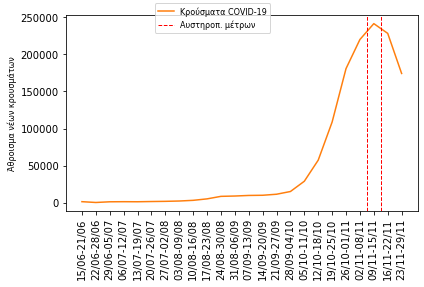

In [7]:
covid_cases_path = "input\\Italy_Covid_Data_Province.csv"

cov_df = pd.read_csv(covid_cases_path)
cov_df['ProvinceCode'] = cov_df ['ProvinceCode'].astype(int)
cov_df['Date'] = cov_df['Date'].astype('datetime64[ns]')
cov_df['Date'] = pd.to_datetime(cov_df['Date']).dt.date

regMask = cov_df["ProvinceCode"] <= 111
cov_df_prov = cov_df.loc[regMask]


cov_df_prov = cov_df_prov[['Date','TotalPositiveCases']]
print(cov_df_prov.head())
cov_df_prov = cov_df_prov.groupby('Date').sum()
print(cov_df_prov.head(100))
prev = 0
# print(cov_df_prov.head(100))
for index, row in cov_df_prov.iterrows():
    temp = row[0]
    row[0] -= prev
    prev = temp
    # print(row[0])
# print(cov_df_prov.head(100))

cov_df_prov = cov_df_prov.reset_index()
startDate = DT.date(2020,6,8)
tempTXT = "startDate,endDate,totalCases\n"
lw = 0
count = 0
for x in range(25):
    week_end = startDate + DT.timedelta(days = 6)
    # print(startDate,week_end)
    mask = (cov_df_prov['Date']>=startDate) & (cov_df_prov['Date']<=week_end)
    cov_week = cov_df_prov.loc[mask]


    temp = cov_week['TotalPositiveCases'].sum()
    tw = temp
    # lw = temp
    # tw = tw - lw
    # lw = cov_week['TotalPositiveCases'].sum()
    # tw = max(0,tw)
    if count != 0:
        tempTXT += startDate.strftime("%d/%m")+","+week_end.strftime("%d/%m")+","+str(tw)+"\n"
    count += 1
    # print(temp_cases)
    startDate = startDate + DT.timedelta(days = 7)
# print(tempTXT)
dates_file = open("output\\aggregated_Covid_Cases_after_dataset.csv", "w")
dates_file.write(tempTXT)
dates_file.close()

# Plot them
in_csv = "output\\aggregated_Covid_Cases_after_dataset.csv"
df = pd.read_csv(in_csv)
print(df.head())
# df = df.set_index(['startDate','endDate'])
fig = plt.figure()

# print(x)
plt.plot(df.iloc[:,0]+"-"+df.iloc[:,1],df.iloc[:,2],color='tab:orange',label='Κρούσματα COVID-19')
plt.xticks(rotation = 90)

xposition = [20.5,21.5]
for xc in xposition[:1]:
    plt.axvline(x=xposition[0],linewidth =1, color='r', linestyle='--', label = "Αυστηροπ. μέτρων")
for xc in xposition[1:]:
    plt.axvline(x=xc,linewidth =1, color='r', linestyle='--')

fig.legend(loc="upper center", prop={'size': 8})
# plt.xlabel('Εβδομάδα', fontsize=10)
plt.ylabel("Άθροισμα νέων κρουσμάτων", fontsize=8)
plt.tight_layout()
plt.savefig(in_csv.replace("output","plots").replace("csv","png"), dpi = 500)



# df.plot(x =(df.iloc[:,0]+"-"+df.iloc[:,1]), y=df.iloc[:,2], kind = 'line')
# plt.show()